In [1]:
#imports
import pandas as pd
import math 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from  folium import plugins
from scipy.integrate import odeint
#plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data
df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/Varun101Varun/owid-covid-data_1.csv')
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [3]:
pd.isna(df)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,False,False,False,False,False,False,True,False,False,True,...,False,False,True,True,False,True,True,True,True,False
1,False,False,False,False,True,True,False,True,True,False,...,False,False,True,True,False,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,True,True,False
3,False,False,False,False,True,True,False,True,True,False,...,False,False,True,True,False,True,True,True,True,False
4,False,False,False,False,True,True,False,True,True,False,...,False,False,True,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37623,True,True,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
37624,True,True,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
37625,True,True,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
37626,True,True,False,False,True,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True


In [4]:
df1 = df[df['location'].str.contains('India')]
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
16118,IND,Asia,India,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
16119,IND,Asia,India,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
16120,IND,Asia,India,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
16121,IND,Asia,India,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
16122,IND,Asia,India,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


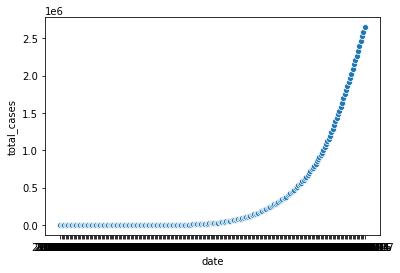

In [5]:
sns.scatterplot(data = df1, x = df1['date'] , y = df1['total_cases'])

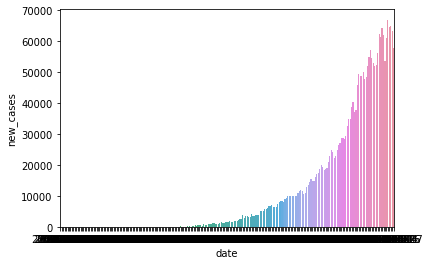

In [6]:
sns.barplot(data = df1 , x = df1['date'] , y = df1['new_cases'])

In [7]:
list(df.columns.values)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

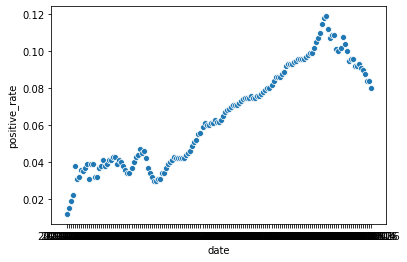

In [8]:
sns.scatterplot(data = df1,x = df1['date'] , y = df1['positive_rate'])

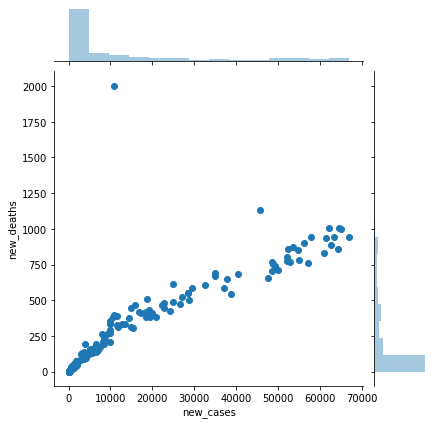

In [9]:
sns.jointplot(data = df1 , x = df1['new_cases'] , y = df1['new_deaths'])

In [10]:
#State Wise Data of India 
dfs = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/Varun101Varun/summarymohfw1update.csv')
dfs.head()

,Unnamed: 0,10-Mar,10-Mar.1,10-Mar.2,10-Mar.3,11-Mar,11-Mar.1,11-Mar.2,11-Mar.3,12-Mar,...,14-Aug.2,14-Aug.3,15-Aug,15-Aug.1,15-Aug.2,15-Aug.3,16-Aug,16-Aug.1,16-Aug.2,16-Aug.3
0,NaN,TCIN,TCFN,Cured,Death,TCIN,TCFN,Cured,Death,TCIN,...,Cured,Death,TCIN,TCFN,Cured,Death,TCIN,TCFN,Cured,Death
1,Andhra Pradesh,0,0,0,0,0,0,0,0,1,...,170984,2378,273085,0,180703,2475,281817,0,191117,2562
2,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,924,22,2186,0,1032,24,2306,0,1128,24
3,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,1718,4,2607,0,1750,5,2658,0,1771,5
4,Assam,0,0,0,0,0,0,0,0,0,...,49383,169,74501,0,51693,175,75558,0,53286,182


In [11]:
from fbprophet import Prophet
confirmed = df1.groupby('date').sum()['total_cases'].reset_index()
deaths = df1.groupby('date').sum()['total_deaths'].reset_index()


In [12]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [13]:
confirmed.tail()

,ds,y
226,2020-08-13,2396637.0
227,2020-08-14,2461190.0
228,2020-08-15,2526192.0
229,2020-08-16,2589682.0
230,2020-08-17,2647663.0


In [14]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=550)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
776,2022-02-14
777,2022-02-15
778,2022-02-16
779,2022-02-17
780,2022-02-18


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
776,2022-02-14,2.544243e+07,1.432306e+07,3.714006e+07
777,2022-02-15,2.547821e+07,1.433554e+07,3.725571e+07
778,2022-02-16,2.552088e+07,1.428740e+07,3.731292e+07
779,2022-02-17,2.556347e+07,1.431838e+07,3.737851e+07
780,2022-02-18,2.560669e+07,1.433866e+07,3.751611e+07


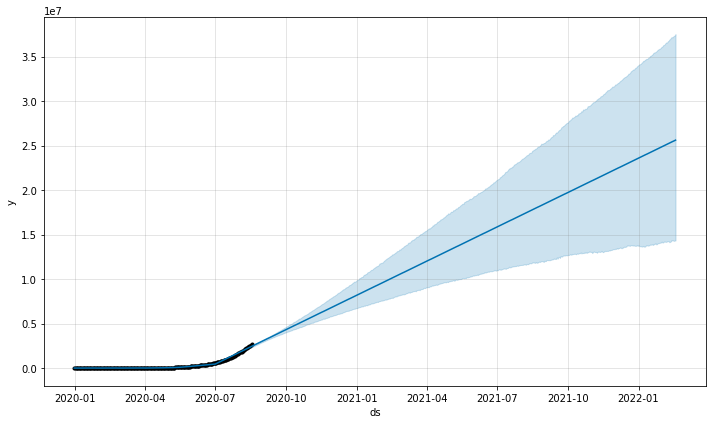

In [16]:
confirmed_forecast_plot = m.plot(forecast)

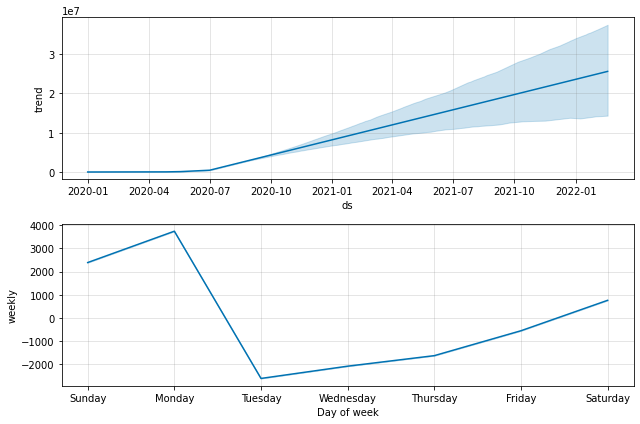

In [17]:
confirmed_forecast_plot =m.plot_components(forecast)

In [18]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [19]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=550)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
776,2022-02-14
777,2022-02-15
778,2022-02-16
779,2022-02-17
780,2022-02-18


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
776,2022-02-14,423727.248623,243412.454646,601720.125732
777,2022-02-15,424329.304541,243928.087797,602899.293971
778,2022-02-16,425068.837186,244702.663190,604449.030217
779,2022-02-17,425767.806305,245230.636608,605540.621766
780,2022-02-18,426457.473983,243174.891775,606255.042623


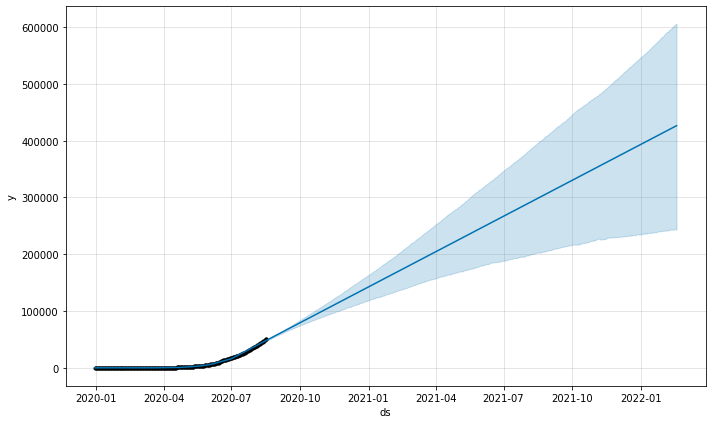

In [21]:
deaths_forecast_plot = m.plot(forecast)

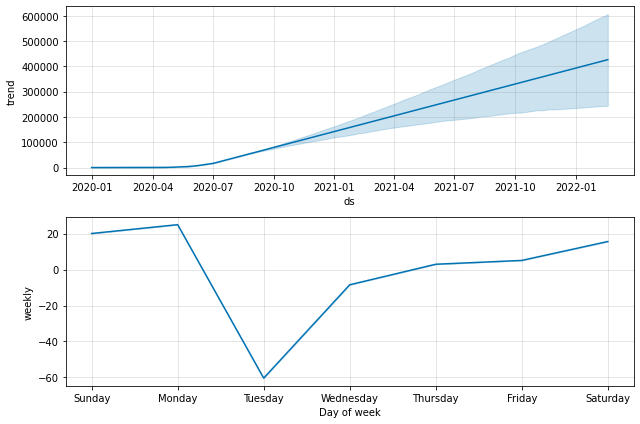

In [22]:
deaths_forecast_plot = m.plot_components(forecast)

In [23]:
print(df1['date'].iloc[79])

2020-03-19


In [24]:
pop_size = 1.3e9

In [25]:
γ = 1 / 18
σ = 1 / 5.2

In [26]:
def F(x, t, R0=1.6):
    """
    Time derivative of the state vector.

        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant

    """
    s, e, i = x

    # New exposure of susceptibles
    β = R0(t) * γ if callable(R0) else R0 * γ
    ne = β * s * i

    # Time derivatives
    ds = - ne
    de = ne - σ * e
    di = σ * e - γ * i

    return ds, de, di

In [27]:
#R0 can be a constant or a given function of time
#inital conditions of s , e , i
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

In [28]:
x_0 = s_0, e_0, i_0

In [29]:
def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.

    """
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return i_path, c_path

In [30]:
import numpy as np
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

In [31]:
R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

In [32]:
def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='upper left')

    plt.show()

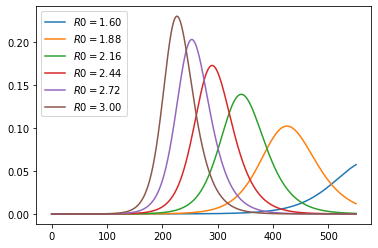

In [33]:
plot_paths(i_paths, labels)

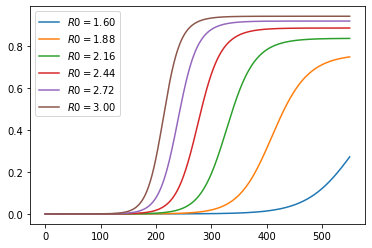

In [34]:
plot_paths(c_paths, labels)

In [35]:
from math import exp
def R0_mitigating(t, r0=3, η=1, r_bar=1.6):
    R0 = r0 * exp(- η * t) + (1 - exp(- η * t)) * r_bar
    return R0

η_vals = 1/5, 1/10, 1/20, 1/50, 1/100
labels = [fr'$\eta = {η:.2f}$' for η in η_vals]

i_paths, c_paths = [], []

for η in η_vals:
    R0 = lambda t: R0_mitigating(t, η=η)
    i_path, c_path = solve_path(R0, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

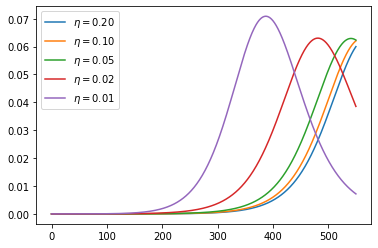

In [36]:
plot_paths(i_paths, labels)

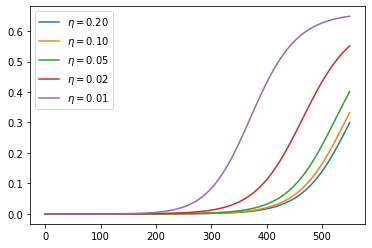

In [37]:
plot_paths(c_paths, labels)

In [38]:
# initial conditions
i_0 = 25_000 / pop_size
e_0 = 75_000 / pop_size
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0

In [39]:
R0_paths = (lambda t: 0.5 if t < 30 else 2,
            lambda t: 0.5 if t < 120 else 2)

labels = [f'scenario {i}' for i in (1, 2)]

i_paths, c_paths = [], []

for R0 in R0_paths:
    i_path, c_path = solve_path(R0, t_vec, x_init=x_0)
    i_paths.append(i_path)
    c_paths.append(c_path)

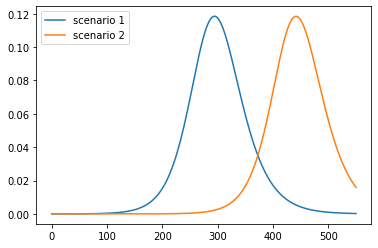

In [40]:
plot_paths(i_paths, labels)

In [41]:
ν = 0.01

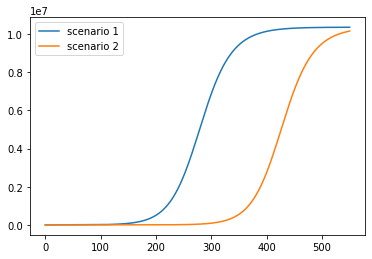

In [42]:
paths = [path * ν * pop_size for path in c_paths]
plot_paths(paths, labels)


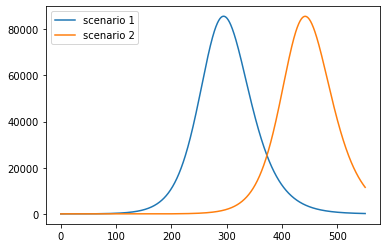

In [43]:
paths = [path * ν * γ * pop_size for path in i_paths]
plot_paths(paths, labels)